### **데이터에 대한 이해**

In [2]:
import torch

In [6]:
# 1시간 공부한 사람은 2점, 2시간은 4점, 3시간은 6점...
# 입력과 출력을 각기 다른 텐서에 저장

x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

---
### **가설 수립**

선형 회귀의 가설

y = Wx + b or H(x) = Wx + b 로서 표현

---
### **비용 함수에 대한 이해**

선형 회귀의 가설

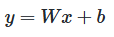

다음과 같이 표현하기도 함



이때의 W를 가중치(Weight)라고 하고, b를 편항(bias)이라고 함

비용 함수(cost function) = 손실 함수(loss function) = 오차 함수(error function) = 목적 함수(objective function)

모두 같은 용어임

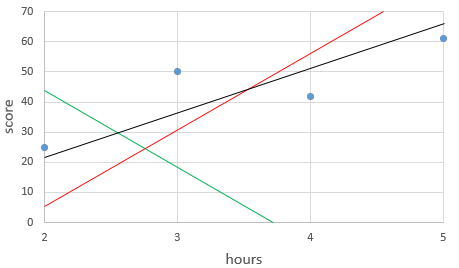

위 4개의 점의 관계를 가장 잘 표현하는 직선은 검은색 직선임
-> 점들과 가장 가까워 보이기 때문임

하지만 가깝다는 느낌을 수학에서 표현하는 건 의미가 없기 때문에
오차라는 개념을 사용해서 수로 정확히 표현해보기로 함

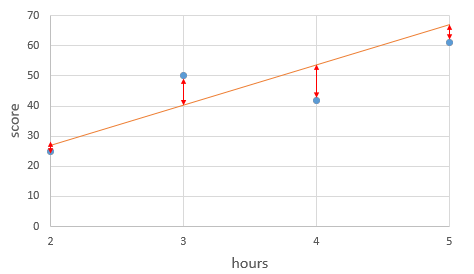

위 그림에서 실제값(점)과 예측값(주황색 선)의 오차가 음수와 양수로 제각각이기 때문에
오차를 더했을 시 각 크기 값이 보존되지 않은 채로 더해짐

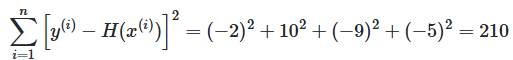

따라서 위 수식처럼 각 오차값을 제곱해서 더해줌

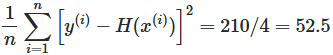

이때 데이터 개수인 n으로 나누면 평균 제곱 오차(Mean Squared Error, MSE)를 구할 수 있음

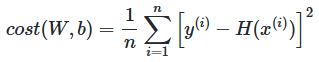

MSE를 비용 함수로 재정의하면 다음과 같음
이를 통해 훈련 데이터를 가장 잘 나타내는 직선을 찾을 수 있음

---
### **경사 하강법**

cost가 가장 낮을 때의 W(weight)와 b(bias)값을 찾는 방법

선형 회귀에 가장 적합한 비용 함수는 평균 제곱 오차
가장 적합한 옵티마이저는 경사 하강법
-> 경사 하강법

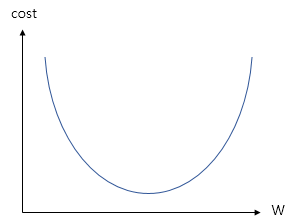

W를 기울기라고 칭하면 기울기가 너무 낮아도, 혹은 기울기가 너무 커도 cost가 무한대로 커짐

cost가 가장 낮을 때는 위 그래프의 접선의 기울기가 0일 때라고 할 수 있음

경사 하강법이란, 비용 함수를 미분해서 현재 W에서의 접선의 기울기를 구하고

접선의 기울기가 낮은 방향으로 W의 값을 변경하는 작업을 반복하는 것에 있음



-> 기울기가 음수일 때는 W의 값을 증가하여 접선의 기울기가 0인 방향으로 W 조정

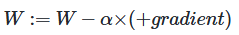

-> 기울기가 양수일 때는 W의 값을 감소하여 접선의 기울기가 0인 방향으로 W 조정

여기서 알파는 학습률을 뜻함

학습률이란, W의 값을 변경할 때 얼마나 크게 변경할 지를 결정함

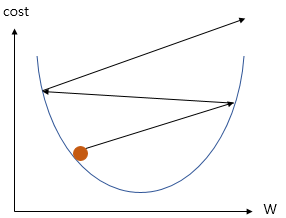

알파가 지나치게 높은 값을 가지면, cost의 값이 발산하게 됨

반면 지나치게 작은 값을 가지만, 학습 속도가 너무 느려짐

---
### **파이토치로 선형 회귀 구현하기**

In [7]:
# 기본 셋팅

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1) # 현재 실습하는 코드를 재실행해도 같은 결과가 나오도록 랜덤 시드 지정

In [12]:
# 변수 선언언

x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

print(x_train)
print(x_train.shape)
print("--------------")
print(y_train)
print(y_train.shape)

tensor([[1.],
        [2.],
        [3.]])
torch.Size([3, 1])
--------------
tensor([[2.],
        [4.],
        [6.]])
torch.Size([3, 1])


In [14]:
# 가중치와 편향의 초기화

# 가중치 W를 0으로 초기화 -> torch.zeros
# 학습을 통해 값이 변경되는 변수임을 명시함 -> requires_grad

W = torch.zeros(1, requires_grad=True)

print(W)

tensor([0.], requires_grad=True)


In [16]:
# 편향 b를 0으로 초기화 -> torch.zeros
# 학습을 통해 값이 변경되는 변수임을 명시함 -> requires_grad

b = torch.zeros(1, requires_grad=True)

print(b)

tensor([0.], requires_grad=True)


In [17]:
# 가설 세우기

hypothesis = x_train * W + b
print(hypothesis)

tensor([[0.],
        [0.],
        [0.]], grad_fn=<AddBackward0>)


In [18]:
# 비용 함수 선언하기

cost = torch.mean((hypothesis - y_train) ** 2)

In [19]:
# 경사 하강법 구현하기

optimizer = optim.SGD([W, b], lr=0.01) # l earning r ate

optimizer.zero_grad() # gradient를 0으로 초기화

cost.backward() # 비용 함수를 미분하여 gradient 계산

optimizer.step() # W와 b를 업데이트

In [21]:
# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

# 모델 초기화
W = torch.zeros(1, requires_grad=True) # requires_grad 변수에 한해서 backward 시 자동으로 미분 계산됨
b = torch.zeros(1, requires_grad=True)

# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.01)

# 원하는 경사 하강법 횟수
nb_epochs = 2000

for epoch in range(nb_epochs + 1):
    
    # H(x) 계산
    hypothesis = x_train * W + b

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad() # 미분값이 초기화가 자동으로 안되기 때문에 적어줘야 함
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f}, Cost: {:.6f}'.format(epoch, nb_epochs, W.item(), b.item(), cost.item()))

Epoch    0/2000 W: 0.187, b: 0.080, Cost: 18.666666
Epoch  100/2000 W: 1.746, b: 0.578, Cost: 0.048171
Epoch  200/2000 W: 1.800, b: 0.454, Cost: 0.029767
Epoch  300/2000 W: 1.843, b: 0.357, Cost: 0.018394
Epoch  400/2000 W: 1.876, b: 0.281, Cost: 0.011366
Epoch  500/2000 W: 1.903, b: 0.221, Cost: 0.007024
Epoch  600/2000 W: 1.924, b: 0.174, Cost: 0.004340
Epoch  700/2000 W: 1.940, b: 0.136, Cost: 0.002682
Epoch  800/2000 W: 1.953, b: 0.107, Cost: 0.001657
Epoch  900/2000 W: 1.963, b: 0.084, Cost: 0.001024
Epoch 1000/2000 W: 1.971, b: 0.066, Cost: 0.000633
Epoch 1100/2000 W: 1.977, b: 0.052, Cost: 0.000391
Epoch 1200/2000 W: 1.982, b: 0.041, Cost: 0.000242
Epoch 1300/2000 W: 1.986, b: 0.032, Cost: 0.000149
Epoch 1400/2000 W: 1.989, b: 0.025, Cost: 0.000092
Epoch 1500/2000 W: 1.991, b: 0.020, Cost: 0.000057
Epoch 1600/2000 W: 1.993, b: 0.016, Cost: 0.000035
Epoch 1700/2000 W: 1.995, b: 0.012, Cost: 0.000022
Epoch 1800/2000 W: 1.996, b: 0.010, Cost: 0.000013
Epoch 1900/2000 W: 1.997, b: 0

In [29]:
# torch.manual_seed()를 하는 이유
# 다른 컴퓨터에서도 동일한 결과를 얻을 수 있음

torch.manual_seed(3) # -> 난수 발생 순서 시드
print("랜덤 시드가 3일 때")
for i in range(1, 3):
    print(torch.rand(1))


torch.manual_seed(5)
print("랜덤 시드가 5일 때")
for i in range(1, 3):
    print(torch.rand(1))

랜덤 시드가 3일 때
tensor([0.0043])
tensor([0.1056])
랜덤 시드가 5일 때
tensor([0.8303])
tensor([0.1261])


In [32]:
# 자동 미분(Autograd) 실습하기

w = torch.tensor(2.0, requires_grad=True)
y = w**2
z = 2*y + 5

z.backward()

print('수식을 w로 미분한 값 : {}'.format(w.grad))

수식을 w로 미분한 값 : 8.0
